**Importing the libraries:**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers

Using TensorFlow backend.


**Uploading the dataset into Colab:**

In [8]:
from google.colab import files

uploaded = files.upload()

Saving hour.csv to hour (1).csv


**Loading the dataset and inspecting first few rows:**

In [9]:
# Data can be downloaded at https://archive.ics.uci.edu/ml/machine-learning-databases/00275/

data = pd.read_csv('hour.csv')

data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Viewing dimensions of the dataset:**

In [10]:
data.shape

(17379, 17)

**Data Preprocessing:**

In [0]:
# Feature engineering

ohe_features = ['season', 'weathersit', 'mnth', 'hr', 'weekday']

for feature in ohe_features:
  dummies = pd.get_dummies(data[feature], 
                           prefix = feature,
                           drop_first = False)
  data = pd.concat([data, dummies], axis = 1)

drop_features = ['instant', 'dteday', 'season', 'weathersit',
                 'weekday', 'atemp', 'mnth', 'workingday',
                 'hr', 'casual', 'registered']
data = data.drop(drop_features, axis = 1)

In [0]:
norm_features = ['cnt', 'temp', 'hum', 'windspeed']

scaled_features = {}

for feature in norm_features:
  mean, std = data[feature].mean(), data[feature].std()
  scaled_features[feature] = [mean, std]
  data.loc[:, feature] = (data[feature] - mean) / std

In [0]:
# Save the final month for testing
test_data = data[-31*24:]
data = data[:-31*24]

# Extract the target field
target_fields= ['cnt']
features, targets = data.drop(target_fields, axis = 1), data[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis = 1), test_data[target_fields]

# Create a validation set (based on the last)
X_train, y_train = features[:-30*24], targets[:-30*24]
X_val, y_val = features[-30*24:], targets[-30*24:]

**Building the model without L2 regularization:**

In [14]:
model = Sequential()

model.add(Dense(250, input_dim = X_train.shape[1],
                activation = 'relu'))
model.add(Dense(150, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(25, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

# Compile model
model.compile(loss = 'mse', 
              optimizer = 'sgd', 
              metrics = ['mse'])

Instructions for updating:
Colocations handled automatically by placer.


**Training the model:**

In [15]:
n_epochs = 4000
batch_size = 1024

history = model.fit(X_train.values, y_train['cnt'],
                    validation_data= (X_val.values, y_val['cnt']),
                    batch_size = batch_size,
                    epochs = n_epochs, 
                    verbose = 0)

Instructions for updating:
Use tf.cast instead.


**Plotting the training and validation loss:**

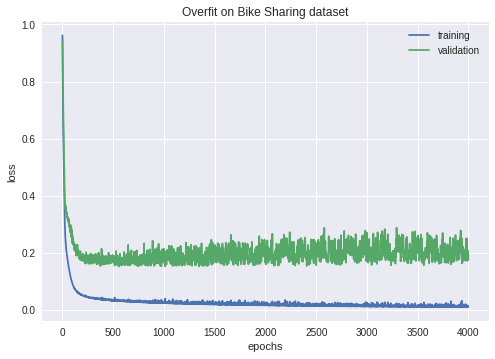

In [22]:
plt.plot(np.arange(len(history.history['loss'])),
         history.history['loss'],
         label = 'training')

plt.plot(np.arange(len(history.history['val_loss'])),
         history.history['val_loss'],
         label = 'validation')

plt.title('Overfit on Bike Sharing dataset')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc = 0)
plt.show()

# Model overfits on training data (validation loss shows slightly
# increasing trend after 1000 epochs)

**Printing the minimum loss and after how many epochs is this minimum reached:**

In [17]:
print('Minimum loss: ', min(history.history['val_loss']),
      '\nAfter ',np.argmin(history.history['val_loss']), ' epochs')

Minimum loss:  0.15261414647102356 
After  1012  epochs


**Defining the network architecture with L2 regularization**

In [0]:
model_reg = Sequential()

model_reg.add(Dense(250, input_dim = X_train.shape[1],
                    activation = 'relu',
                    kernel_regularizer = regularizers.l2(0.005)))
model_reg.add(Dense(150, activation = 'relu'))
model_reg.add(Dense(50, activation = 'relu'))
model_reg.add(Dense(25, activation = 'relu',
                    kernel_regularizer = regularizers.l2(0.005)))
model_reg.add(Dense(1, activation = 'linear'))

# Compile model
model_reg.compile(loss = 'mse',
                  optimizer = 'sgd',
                  metrics = ['mse'])

**Training the model:**

In [0]:
history_reg = model_reg.fit(X_train.values, y_train['cnt'],
                            validation_data = (X_val.values, y_val['cnt']),
                            batch_size = batch_size,
                            epochs = n_epochs,
                            verbose = 0)

**Plotting the results:**

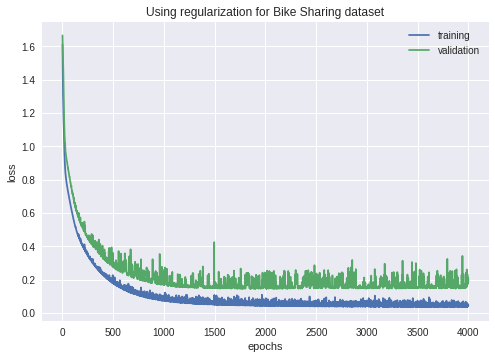

In [23]:
plt.plot(np.arange(len(history_reg.history['loss'])),
         history_reg.history['loss'], 
         label = 'training')

plt.plot(np.arange(len(history_reg.history['val_loss'])),
         history_reg.history['val_loss'],
         label = 'validation')

plt.title('Using regularization for Bike Sharing dataset')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc = 0)
plt.show()

# Model with L2 regularization to prevent overfitting

**Printing statistics of model with L2 regularization:**

In [21]:
print('Minimum loss: ', min(history_reg.history['val_loss']),
     '\nAfter ', np.argmin(history_reg.history['val_loss']), ' epochs')

Minimum loss:  0.1449999362230301 
After  2078  epochs
